In [1]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Random seed to make results deterministic and reproducible
torch.manual_seed(0)

In [3]:
# scaling function for input data
def minmax_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)


# make dataset to train

In [4]:
# make dataset to input
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, [-1]]  # Next close price
        print(_x, "->", _y)
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

In [5]:
# hyper parameters
seq_length = 365 # day
data_dim = 5 # open, high, low, volume, close
hidden_dim = 10
output_dim = 1 # close
learning_rate = 0.01
iterations = 500

In [6]:
# load data
xy = np.loadtxt("google_stock.csv", delimiter=",")
xy = xy[::-1]  # reverse order 최근순으로 정렬되어있기때문에, 바꿔줘야함

In [7]:
# split train-test set
train_size = int(len(xy) * 0.8) # 80%
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]

In [8]:
train_set.shape

(585, 5)

In [9]:
test_set.shape

(512, 5)

In [10]:
# scaling data 모든값을 [0,1] 사의 값으로 변환, 학습의 부담을 덜어줌
train_set = minmax_scaler(train_set)
test_set = minmax_scaler(test_set)

In [11]:
# make train-test dataset to input
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

[[2.53065030e-01 2.45070970e-01 2.33983036e-01 4.66075110e-04
  2.32039560e-01]
 [2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 ...
 [3.82745027e-01 4.02739413e-01 4.01477384e-01 2.30142511e-01
  4.28758170e-01]
 [4.22110427e-01 4.21011429e-01 4.12614301e-01 1.57004571e-01
  4.00276947e-01]
 [3.63458948e-01 3.65752817e-01 3.85510975e-01 1.86528637e-01
  3.80738020e-01]] -> [0.42988455]
[[2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 ...
 [4.22110427e-01 4.21011429e-01 4.12614301e-01 1.57004571e-01
  4.00276947e-01]
 [3.63458948e-01 3.65752817e-01 3.85510975e-01 1.86528637e-01
  3.80738020e-01]
 [4.06550500e-01 4.09442462e-01 4.17264624e-01 2.03603119e-01
  4.29884551e-01]] -> [0.423054

 [0.49746042 0.52152455 0.53328914 0.19345702 0.53824672]] -> [0.52740341]
[[0.0767648  0.11393376 0.1029582  0.24120283 0.12374741]
 [0.11368095 0.10896575 0.12515372 0.15624272 0.12008597]
 [0.11199043 0.12574072 0.13002235 0.17008156 0.13659745]
 ...
 [0.47386173 0.50029228 0.49917263 0.16094828 0.52427009]
 [0.49746042 0.52152455 0.53328914 0.19345702 0.53824672]
 [0.5333412  0.52614873 0.51760918 0.18686027 0.52740341]] -> [0.51613766]
[[0.11368095 0.10896575 0.12515372 0.15624272 0.12008597]
 [0.11199043 0.12574072 0.13002235 0.17008156 0.13659745]
 [0.13493355 0.12938155 0.13621566 0.15063189 0.12455713]
 ...
 [0.49746042 0.52152455 0.53328914 0.19345702 0.53824672]
 [0.5333412  0.52614873 0.51760918 0.18686027 0.52740341]
 [0.50615449 0.50519205 0.49401758 0.19487317 0.51613766]] -> [0.53180408]
[[0.11199043 0.12574072 0.13002235 0.17008156 0.13659745]
 [0.13493355 0.12938155 0.13621566 0.15063189 0.12455713]
 [0.10408962 0.11202828 0.12085782 0.09108183 0.1241346 ]
 ...
 [0.53

 [0.81014161 0.82854227 0.86600435 0.16614681 0.84034382]] -> [0.8491804]
[[0.22822425 0.22244355 0.24468696 0.15803531 0.23707395]
 [0.22787922 0.22091228 0.20824335 0.12791073 0.21609131]
 [0.19437874 0.19178579 0.19685934 0.16659496 0.18444154]
 ...
 [0.78436956 0.80683358 0.83890473 0.15226315 0.82928929]
 [0.81014161 0.82854227 0.86600435 0.16614681 0.84034382]
 [0.81714539 0.81469361 0.85719795 0.13477637 0.8491804 ]] -> [0.81795327]
[[0.22787922 0.22091228 0.20824335 0.12791073 0.21609131]
 [0.19437874 0.19178579 0.19685934 0.16659496 0.18444154]
 [0.16163736 0.17909399 0.18325562 0.16209555 0.18345577]
 ...
 [0.81014161 0.82854227 0.86600435 0.16614681 0.84034382]
 [0.81714539 0.81469361 0.85719795 0.13477637 0.8491804 ]
 [0.81266032 0.81231195 0.83006228 0.18480774 0.81795327]] -> [0.83002868]
[[0.19437874 0.19178579 0.19685934 0.16659496 0.18444154]
 [0.16163736 0.17909399 0.18325562 0.16209555 0.18345577]
 [0.17854291 0.20066662 0.20366109 0.15068567 0.21598574]
 ...
 [0.817

 [0.90819324 0.91469646 0.95453529 0.1632697  0.94990285]] -> [0.91202186]
[[0.2886701  0.3008741  0.31893437 0.12906695 0.31727197]
 [0.30602415 0.30441289 0.33232315 0.09396791 0.31609272]
 [0.30602415 0.30294973 0.33422056 0.06329659 0.32452438]
 ...
 [0.94228011 0.92806871 0.95772145 0.16172806 0.95300094]
 [0.90819324 0.91469646 0.95453529 0.1632697  0.94990285]
 [0.91260924 0.91275695 0.89296456 0.24129246 0.91202186]] -> [0.90445284]
[[0.30602415 0.30441289 0.33232315 0.09396791 0.31609272]
 [0.30602415 0.30294973 0.33422056 0.06329659 0.32452438]
 [0.30743868 0.30778134 0.32945929 0.09471184 0.31579343]
 ...
 [0.90819324 0.91469646 0.95453529 0.1632697  0.94990285]
 [0.91260924 0.91275695 0.89296456 0.24129246 0.91202186]
 [0.89080466 0.88424303 0.9174118  0.17719817 0.90445284]] -> [0.86717028]
[[0.30602415 0.30294973 0.33422056 0.06329659 0.32452438]
 [0.30743868 0.30778134 0.32945929 0.09471184 0.31579343]
 [0.286393   0.28429655 0.28129162 0.17044008 0.27650404]
 ...
 [0.91

 [0.76577354 0.75836337 0.7731777  0.18667204 0.78676138]] -> [0.82210748]
[[0.26134529 0.27215599 0.26953141 0.17453617 0.25883077]
 [0.2566532  0.27008035 0.27400631 0.12722058 0.28375646]
 [0.26013769 0.25861348 0.26867231 0.13832571 0.25531025]
 ...
 [0.81697293 0.80727594 0.80704359 0.21896567 0.78126914]
 [0.76577354 0.75836337 0.7731777  0.18667204 0.78676138]
 [0.78326551 0.7920323  0.82249805 0.18074751 0.82210748]] -> [0.7322986]
[[0.2566532  0.27008035 0.27400631 0.12722058 0.28375646]
 [0.26013769 0.25861348 0.26867231 0.13832571 0.25531025]
 [0.23160549 0.25425813 0.25932878 0.118885   0.25990121]
 ...
 [0.76577354 0.75836337 0.7731777  0.18667204 0.78676138]
 [0.78326551 0.7920323  0.82249805 0.18074751 0.82210748]
 [0.81490275 0.81241392 0.75552885 0.22351887 0.7322986 ]] -> [0.78214928]
[[0.26013769 0.25861348 0.26867231 0.13832571 0.25531025]
 [0.23160549 0.25425813 0.25932878 0.118885   0.25990121]
 [0.25306503 0.25150194 0.26326667 0.0988617  0.24929009]
 ...
 [0.783

 [0.62221547 0.65796926 0.6490556  0.27033253 0.67086521]] -> [0.66836577]
[[0.29446633 0.29607643 0.31302742 0.10820113 0.30061979]
 [0.29446633 0.30631838 0.32813461 0.12998118 0.31484279]
 [0.30819757 0.30818972 0.3379078  0.14559469 0.32927716]
 ...
 [0.66313345 0.69866458 0.69653225 0.23573541 0.67442099]
 [0.62221547 0.65796926 0.6490556  0.27033253 0.67086521]
 [0.67486384 0.67294084 0.68389512 0.19122524 0.66836577]] -> [0.69864229]
[[0.29446633 0.30631838 0.32813461 0.12998118 0.31484279]
 [0.30819757 0.30818972 0.3379078  0.14559469 0.32927716]
 [0.31723694 0.32595137 0.35348035 0.12755221 0.34209186]
 ...
 [0.62221547 0.65796926 0.6490556  0.27033253 0.67086521]
 [0.67486384 0.67294084 0.68389512 0.19122524 0.66836577]
 [0.68424797 0.68740194 0.70698548 0.22515909 0.69864229]] -> [0.75989968]
[[0.30819757 0.30818972 0.3379078  0.14559469 0.32927716]
 [0.31723694 0.32595137 0.35348035 0.12755221 0.34209186]
 [0.32517217 0.31652618 0.33092704 0.11466344 0.31142785]
 ...
 [0.67

 [0.80134393 0.80407747 0.84917902 0.15354486 0.83006392]] -> [0.85738331]
[[0.27048812 0.2764603  0.30407761 0.1016223  0.29125515]
 [0.2903262  0.28930518 0.31102265 0.10815631 0.29854269]
 [0.27514579 0.26980817 0.27271756 0.17060142 0.25062793]
 ...
 [0.80096447 0.81499994 0.85053939 0.15330286 0.83766818]
 [0.80134393 0.80407747 0.84917902 0.15354486 0.83006392]
 [0.79944642 0.82170299 0.84824821 0.14488662 0.85738331]] -> [0.86333302]
[[0.2903262  0.28930518 0.31102265 0.10815631 0.29854269]
 [0.27514579 0.26980817 0.27271756 0.17060142 0.25062793]
 [0.24468131 0.26507839 0.25034326 0.17772699 0.28146798]
 ...
 [0.80134393 0.80407747 0.84917902 0.15354486 0.83006392]
 [0.79944642 0.82170299 0.84824821 0.14488662 0.85738331]
 [0.83422336 0.84075774 0.88938117 0.16607511 0.86333302]] -> [0.86269913]
[[0.27514579 0.26980817 0.27271756 0.17060142 0.25062793]
 [0.24468131 0.26507839 0.25034326 0.17772699 0.28146798]
 [0.26403626 0.25694623 0.25596362 0.22558932 0.24055914]
 ...
 [0.79

 [0.89470328 0.90176657 0.94914382 0.16145917 0.93803867]] -> [0.96482989]
[[0.20131351 0.20253817 0.22102369 0.11080936 0.216725  ]
 [0.21442396 0.20696161 0.20222927 0.18143766 0.18789182]
 [0.17543765 0.17322446 0.19120304 0.11878641 0.17423205]
 ...
 [0.89480688 0.88921092 0.94918337 0.10104867 0.91761961]
 [0.89470328 0.90176657 0.94914382 0.16145917 0.93803867]
 [0.91705998 0.92575496 0.96563288 0.13875594 0.96482989]] -> [0.92018953]
[[0.21442396 0.20696161 0.20222927 0.18143766 0.18789182]
 [0.17543765 0.17322446 0.19120304 0.11878641 0.17423205]
 [0.17788727 0.17092767 0.18296925 0.14572018 0.17060595]
 ...
 [0.89470328 0.90176657 0.94914382 0.16145917 0.93803867]
 [0.91705998 0.92575496 0.96563288 0.13875594 0.96482989]
 [0.94828323 0.93204991 0.93710122 0.18128529 0.92018953]] -> [0.91575362]
[[0.17543765 0.17322446 0.19120304 0.11878641 0.17423205]
 [0.17788727 0.17092767 0.18296925 0.14572018 0.17060595]
 [0.16149926 0.18242849 0.19138205 0.10098593 0.19341898]
 ...
 [0.91

 [0.7636345  0.76743147 0.77521827 0.17865914 0.75225997]] -> [0.75366827]
[[0.12541128 0.12560473 0.13145438 0.22924621 0.11515716]
 [0.11205927 0.11917375 0.12970027 0.20806668 0.12121244]
 [0.09484332 0.13002817 0.11792231 0.16701622 0.14370895]
 ...
 [0.73996696 0.75708739 0.78073144 0.11734337 0.78838069]
 [0.7636345  0.76743147 0.77521827 0.17865914 0.75225997]
 [0.72112941 0.7336774  0.7627603  0.15764991 0.75366827]] -> [0.7314537]
[[0.11205927 0.11917375 0.12970027 0.20806668 0.12121244]
 [0.09484332 0.13002817 0.11792231 0.16701622 0.14370895]
 [0.1325874  0.13730964 0.13603665 0.15275612 0.11797353]
 ...
 [0.7636345  0.76743147 0.77521827 0.17865914 0.75225997]
 [0.72112941 0.7336774  0.7627603  0.15764991 0.75366827]
 [0.7166098  0.71462285 0.74904925 0.14899166 0.7314537 ]] -> [0.76461708]
[[0.09484332 0.13002817 0.11792231 0.16701622 0.14370895]
 [0.1325874  0.13730964 0.13603665 0.15275612 0.11797353]
 [0.114371   0.12910937 0.14154965 0.14366765 0.12600055]
 ...
 [0.721

 [0.73831098 0.72421824 0.71916442 0.30424845 0.70117697]] -> [0.70818302]
[[0.0115234  0.02553335 0.01231486 0.29986556 0.03566318]
 [0.0348806  0.03043316 0.02588276 0.18494219 0.01274435]
 [0.00100056 0.         0.         0.20783365 0.        ]
 ...
 [0.75990835 0.75086076 0.77217545 0.17698306 0.76679979]
 [0.73831098 0.72421824 0.71916442 0.30424845 0.70117697]
 [0.70422411 0.70264558 0.73691335 0.18594604 0.70818302]] -> [0.71603374]
[[0.0348806  0.03043316 0.02588276 0.18494219 0.01274435]
 [0.00100056 0.         0.         0.20783365 0.        ]
 [0.01445593 0.02383205 0.01729096 0.21175047 0.01277958]
 ...
 [0.73831098 0.72421824 0.71916442 0.30424845 0.70117697]
 [0.70422411 0.70264558 0.73691335 0.18594604 0.70818302]
 [0.70294759 0.70363247 0.73190163 0.1306534  0.71603374]] -> [0.72138502]
[[0.00100056 0.         0.         0.20783365 0.        ]
 [0.01445593 0.02383205 0.01729096 0.21175047 0.01277958]
 [0.         0.02468275 0.01947473 0.19786681 0.02929095]
 ...
 [0.70

 [0.83725945 0.83755928 0.89331896 0.11488751 0.87533795]] -> [0.86632539]
[[0.03079507 0.0468912  0.03749524 0.11493086 0.06307991]
 [0.04964474 0.04924065 0.05811669 0.07995149 0.06003761]
 [0.05577081 0.06919601 0.06225181 0.10274777 0.08186695]
 ...
 [0.66095949 0.67119436 0.68276022 0.0658319  0.69040907]
 [0.68433294 0.68729636 0.70862469 0.07167903 0.70367585]
 [0.69385186 0.68591797 0.70457264 0.04691804 0.69564676]] -> [0.70853719]
[[0.04964474 0.04924065 0.05811669 0.07995149 0.06003761]
 [0.05577081 0.06919601 0.06225181 0.10274777 0.08186695]
 [0.07493465 0.08514135 0.08925661 0.12907865 0.10093617]
 ...
 [0.68433294 0.68729636 0.70862469 0.07167903 0.70367585]
 [0.69385186 0.68591797 0.70457264 0.04691804 0.69564676]
 [0.69856425 0.69077358 0.70690046 0.06886827 0.70853719]] -> [0.69922226]
[[0.05577081 0.06919601 0.06225181 0.10274777 0.08186695]
 [0.07493465 0.08514135 0.08925661 0.12907865 0.10093617]
 [0.08586739 0.0854232  0.08274251 0.10242816 0.08158458]
 ...
 [0.69

 [0.80267664 0.79684591 0.82367413 0.03142597 0.81103373]] -> [0.80077793]
[[0.10682189 0.11173783 0.09273703 0.11057841 0.09563571]
 [0.09881095 0.10688229 0.09842094 0.10469368 0.11818623]
 [0.10119843 0.09732746 0.10480722 0.12016695 0.10667563]
 ...
 [0.81841605 0.81489015 0.83603162 0.01806782 0.81755743]
 [0.80267664 0.79684591 0.82367413 0.03142597 0.81103373]
 [0.79724175 0.78882627 0.81383916 0.03987704 0.80077793]] -> [0.80055836]
[[0.09881095 0.10688229 0.09842094 0.10469368 0.11818623]
 [0.10119843 0.09732746 0.10480722 0.12016695 0.10667563]
 [0.10368031 0.11606093 0.10161408 0.15109469 0.13383672]
 ...
 [0.80267664 0.79684591 0.82367413 0.03142597 0.81103373]
 [0.79724175 0.78882627 0.81383916 0.03987704 0.80077793]
 [0.80418454 0.79477843 0.81937923 0.03769612 0.80055836]] -> [0.79290561]
[[0.10119843 0.09732746 0.10480722 0.12016695 0.10667563]
 [0.10368031 0.11606093 0.10161408 0.15109469 0.13383672]
 [0.12532604 0.11925629 0.13081571 0.06298354 0.1291008 ]
 ...
 [0.79

 [0.79532523 0.79703386 0.80825445 0.06021978 0.81354279]] -> [0.84801165]
[[0.0289102  0.03758716 0.02568048 0.16841987 0.04924857]
 [0.03268014 0.04028115 0.04608481 0.07262848 0.05323164]
 [0.02878445 0.02226819 0.01862368 0.15272098 0.02265202]
 ...
 [0.78382709 0.78503586 0.80898569 0.04243398 0.79845685]
 [0.79532523 0.79703386 0.80825445 0.06021978 0.81354279]
 [0.8183846  0.83678752 0.84062976 0.09015107 0.84801165]] -> [0.84703938]
[[0.03268014 0.04028115 0.04608481 0.07262848 0.05323164]
 [0.02878445 0.02226819 0.01862368 0.15272098 0.02265202]
 [0.0191711  0.04184757 0.02976772 0.10829409 0.05818716]
 ...
 [0.79532523 0.79703386 0.80825445 0.06021978 0.81354279]
 [0.8183846  0.83678752 0.84062976 0.09015107 0.84801165]
 [0.83908777 0.83390551 0.85886274 0.08316647 0.84703938]] -> [0.80723884]
[[0.02878445 0.02226819 0.01862368 0.15272098 0.02265202]
 [0.0191711  0.04184757 0.02976772 0.10829409 0.05818716]
 [0.05658778 0.05218542 0.05906512 0.12385196 0.05376489]
 ...
 [0.81

 [0.86550847 0.86701791 0.89031523 0.0694699  0.88614982]] -> [0.92924351]
[[0.0618265  0.05181438 0.04853598 0.13575303 0.05338088]
 [0.03930134 0.0378615  0.04365036 0.1387706  0.04851955]
 [0.04549018 0.05615622 0.05702968 0.13533941 0.06438957]
 ...
 [0.89158364 0.88102087 0.89679743 0.1156547  0.87862246]
 [0.86550847 0.86701791 0.89031523 0.0694699  0.88614982]
 [0.8966103  0.91613823 0.92486518 0.11001438 0.92924351]] -> [0.91218165]
[[0.03930134 0.0378615  0.04365036 0.1387706  0.04851955]
 [0.04549018 0.05615622 0.05702968 0.13533941 0.06438957]
 [0.05965879 0.0632361  0.05681257 0.08494317 0.07038014]
 ...
 [0.86550847 0.86701791 0.89031523 0.0694699  0.88614982]
 [0.8966103  0.91613823 0.92486518 0.11001438 0.92924351]
 [0.93361815 0.92083724 0.92588702 0.09863034 0.91218165]] -> [0.88520894]
[[0.04549018 0.05615622 0.05702968 0.13533941 0.06438957]
 [0.05965879 0.0632361  0.05681257 0.08494317 0.07038014]
 [0.0579624  0.0661183  0.06641756 0.08794194 0.08054195]
 ...
 [0.89

 [0.79523108 0.79640748 0.80410008 0.10007802 0.7886088 ]] -> [0.76577593]
[[0.03100749 0.02583195 0.03167603 0.07210205 0.03898505]
 [0.0361283  0.04829337 0.04984509 0.1227615  0.06241364]
 [0.05563766 0.04860656 0.05693399 0.12843942 0.06228825]
 ...
 [0.76375227 0.77366423 0.78366381 0.0748094  0.7915256 ]
 [0.79523108 0.79640748 0.80410008 0.10007802 0.7886088 ]
 [0.77983721 0.76922525 0.76658052 0.08932382 0.76577593]] -> [0.76794004]
[[0.0361283  0.04829337 0.04984509 0.1227615  0.06241364]
 [0.05563766 0.04860656 0.05693399 0.12843942 0.06228825]
 [0.06311466 0.06580491 0.07136711 0.06797522 0.06699281]
 ...
 [0.79523108 0.79640748 0.80410008 0.10007802 0.7886088 ]
 [0.77983721 0.76922525 0.76658052 0.08932382 0.76577593]
 [0.76893598 0.75894062 0.7834085  0.00552751 0.76794004]] -> [0.78851461]
[[0.05563766 0.04860656 0.05693399 0.12843942 0.06228825]
 [0.06311466 0.06580491 0.07136711 0.06797522 0.06699281]
 [0.0632717  0.05878469 0.06408662 0.06301174 0.07417503]
 ...
 [0.77

 [0.85262802 0.84584099 0.86885733 0.00904331 0.85647969]] -> [0.86162339]
[[0.43900597 0.45782791 0.44011248 0.50139598 0.45850589]
 [0.42634546 0.47073452 0.44423158 0.26791506 0.45624761]
 [0.44418968 0.48840285 0.45923944 0.31981537 0.45562029]
 ...
 [0.85721462 0.847658   0.87300839 0.04154093 0.86071391]
 [0.85262802 0.84584099 0.86885733 0.00904331 0.85647969]
 [0.85193677 0.86188027 0.870061   0.02461998 0.86162339]] -> [0.84123698]
[[0.42634546 0.47073452 0.44423158 0.26791506 0.45624761]
 [0.44418968 0.48840285 0.45923944 0.31981537 0.45562029]
 [0.4453835  0.44138137 0.40176266 0.23519182 0.39973035]
 ...
 [0.85262802 0.84584099 0.86885733 0.00904331 0.85647969]
 [0.85193677 0.86188027 0.870061   0.02461998 0.86162339]
 [0.86142444 0.85050865 0.85582921 0.0569202  0.84123698]] -> [0.83414876]
[[0.44418968 0.48840285 0.45923944 0.31981537 0.45562029]
 [0.4453835  0.44138137 0.40176266 0.23519182 0.39973035]
 [0.40055292 0.39295014 0.34275324 0.29127537 0.33474468]
 ...
 [0.85

 [0.99026114 1.         0.97474223 0.22792521 0.96123452]] -> [0.89540215]
[[0.43071213 0.45193847 0.44388037 0.15082208 0.4518568 ]
 [0.42713086 0.43937641 0.40782973 0.2188537  0.40772806]
 [0.37787072 0.36751284 0.31021499 0.35139175 0.29999364]
 ...
 [1.         0.9876259  0.99572128 0.20748846 0.98896011]
 [0.99026114 1.         0.97474223 0.22792521 0.96123452]
 [0.92727208 0.9182059  0.90883549 0.25397407 0.89540215]] -> [0.87805793]
[[0.42713086 0.43937641 0.40782973 0.2188537  0.40772806]
 [0.37787072 0.36751284 0.31021499 0.35139175 0.29999364]
 [0.16807515 0.2399504  0.15924258 0.4928791  0.22826488]
 ...
 [0.99026114 1.         0.97474223 0.22792521 0.96123452]
 [0.92727208 0.9182059  0.90883549 0.25397407 0.89540215]
 [0.87135178 0.87250009 0.87920312 0.15194074 0.87805793]] -> [0.8746237]
[[0.37787072 0.36751284 0.31021499 0.35139175 0.29999364]
 [0.16807515 0.2399504  0.15924258 0.4928791  0.22826488]
 [0.29973916 0.29671446 0.21052462 0.28303111 0.20458533]
 ...
 [0.927

In [12]:
# convert to tensor
trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

In [13]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, output_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x[:, -1])
        return x

In [14]:
net = Net(data_dim, hidden_dim, output_dim, 1)

In [15]:
# loss & optimizer setting
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [16]:
# start training
for i in range(iterations):

    optimizer.zero_grad()
    outputs = net(trainX_tensor)
    loss = criterion(outputs, trainY_tensor)
    loss.backward()
    optimizer.step()
    print(i, loss.item())

0 0.6482141613960266
1 0.5367249846458435
2 0.44761762022972107
3 0.3722759485244751
4 0.30479997396469116
5 0.24174007773399353
6 0.18202315270900726
7 0.12665405869483948
8 0.07824919372797012
9 0.040274959057569504
10 0.016415990889072418
11 0.009580247104167938
12 0.018968023359775543
13 0.035840585827827454
14 0.0485524907708168
15 0.05234929546713829
16 0.048374075442552567
17 0.03989338129758835
18 0.030211495235562325
19 0.021778099238872528
20 0.015915056690573692
21 0.01291535422205925
22 0.012356155551970005
23 0.013467449694871902
24 0.015430286526679993
25 0.017553769052028656
26 0.019345130771398544
27 0.020512571558356285
28 0.02093653567135334
29 0.02063164860010147
30 0.019709594547748566
31 0.018345888704061508
32 0.01675019972026348
33 0.015138823539018631
34 0.01370844803750515
35 0.01261160522699356
36 0.011936124414205551
37 0.011692523024976254
38 0.011813811957836151
39 0.012170735746622086
40 0.012601310387253761
41 0.012948471121490002
42 0.013095579110085964


327 0.0017259566811844707
328 0.0017242988105863333
329 0.0017226504860445857
330 0.0017210114747285843
331 0.0017193815438076854
332 0.0017177609261125326
333 0.0017161493888124824
334 0.0017145458841696382
335 0.0017129522748291492
336 0.0017113666981458664
337 0.0017097898526117206
338 0.0017082212725654244
339 0.0017066608415916562
340 0.0017051089089363813
341 0.0017035643104463816
342 0.0017020277446135879
343 0.0017004997935146093
344 0.0016989789437502623
345 0.001697466243058443
346 0.0016959605272859335
347 0.0016944622620940208
348 0.0016929717967286706
349 0.0016914879670366645
350 0.0016900112386792898
351 0.0016885424265637994
352 0.001687079668045044
353 0.0016856237780302763
354 0.0016841753385961056
355 0.0016827329527586699
356 0.0016812969697639346
357 0.001679867971688509
358 0.0016784449107944965
359 0.0016770283691585064
360 0.001675617997534573
361 0.0016742133302614093
362 0.001672815065830946
363 0.0016714227385818958
364 0.0016700358828529716
365 0.00166865508

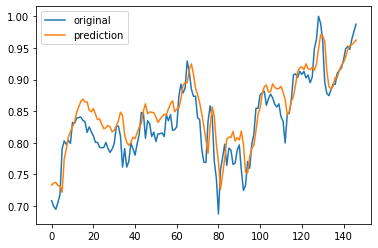

In [17]:
plt.plot(testY)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()